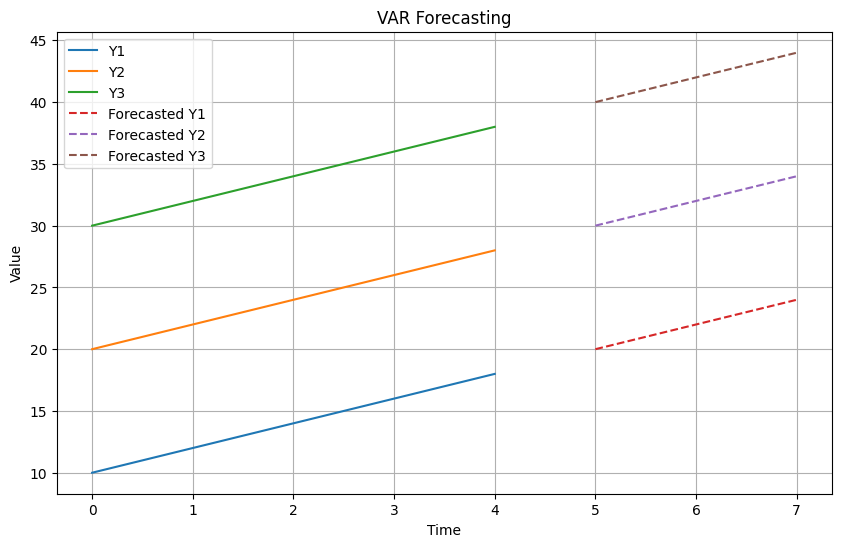

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example time series data
data = pd.DataFrame({
    'Y1': [10, 12, 14, 16, 18],
    'Y2': [20, 22, 24, 26, 28],
    'Y3': [30, 32, 34, 36, 38]
})

# Fit VAR model
model = sm.tsa.VAR(data)
results = model.fit()

# Forecast future values
forecast_horizon = 3
forecast = results.forecast(data.values[-results.k_ar:], steps=forecast_horizon)

# Plot original data and forecasted values
plt.figure(figsize=(10, 6))

# Plot original data
for col in data.columns:
    plt.plot(data.index, data[col], label=col)

# Plot forecasted values
forecast_index = range(len(data), len(data) + forecast_horizon)
for i, col in enumerate(data.columns):
    plt.plot(forecast_index, forecast[:, i], label=f'Forecasted {col}', linestyle='--')

plt.title('VAR Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
